In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-39.26962338844265, 172.96371754030974), (-54.67883823581801, -158.44001472427948), (50.71249197148171, 147.04061767660528), (17.471576710270625, 32.044989555335036), (-11.785979222875255, -83.36381973251231), (-33.73519077807672, 176.3354826631808), (-82.9576612516547, -79.70305051689596), (10.296019165424553, -55.877622670049476), (-4.8394714476348355, -65.81081204701356), (-18.815641167941635, -20.08970051531719), (30.528313218412308, -19.88943871302982), (33.39596238917595, 144.1823323693464), (59.38596885307439, 21.994662937395418), (40.08334212687021, -85.13753576708402), (-86.65316485789175, -46.58512440661997), (87.17173961579081, -83.4011446286404), (76.08799257798219, 50.600867205524395), (-5.670734677647431, 33.332424540813605), (38.487753958554464, -60.76133951273043), (70.27938830537298, 69.13412591307377), (-14.083360994816331, -150.1990666943851), (-60.956732549833646, 171.6757360594106), (1.6820927586349654, -78.79113101472582), (-9.652724869634298, 171.94709301840004

In [18]:
#Citipy doesn't come with the Anaconda module, so we'll install it in our PythonData environment.

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [23]:
# Import the API key.
from config import weather_api_key

In [54]:
# Starting URL for Weather Map API Call. define your metric units
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | opunake
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | marawi
Processing Record 5 of Set 1 | huarmey
Processing Record 6 of Set 1 | ngunguru
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | carauari
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | kardla
Processing Record 13 of Set 1 | muncie
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | sikonge
Processing Record 17 of Set 1 | halifax
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | fare
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | tumaco
Processing Record 22 of Set 1 | lolua
City not found. Skipping...


Processing Record 36 of Set 4 | salalah
Processing Record 37 of Set 4 | hermanus
Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | marsa matruh
Processing Record 41 of Set 4 | yokadouma
Processing Record 42 of Set 4 | port-gentil
Processing Record 43 of Set 4 | navirai
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | sumoto
Processing Record 46 of Set 4 | gulmarg
Processing Record 47 of Set 4 | vitim
Processing Record 48 of Set 4 | mayo
Processing Record 49 of Set 4 | lerwick
Processing Record 50 of Set 4 | mount isa
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | sioux lookout
Processing Record 3 of Set 5 | charleston
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | charters towers
Processing Record 7 of Set 5 | zhezkazgan
Processing Record 8 of Set 5 | phalaborwa
Processing Record 9 of Set 5 | bol
Processing Record 10 of Se

Processing Record 26 of Set 8 | mercedes
Processing Record 27 of Set 8 | laguna
Processing Record 28 of Set 8 | urengoy
Processing Record 29 of Set 8 | xacmaz
Processing Record 30 of Set 8 | arkhara
Processing Record 31 of Set 8 | swan hill
Processing Record 32 of Set 8 | xiuyan
Processing Record 33 of Set 8 | kitui
Processing Record 34 of Set 8 | bambanglipuro
Processing Record 35 of Set 8 | inhambane
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | cabo san lucas
Processing Record 38 of Set 8 | seoul
Processing Record 39 of Set 8 | hobyo
Processing Record 40 of Set 8 | heihe
Processing Record 41 of Set 8 | lityn
Processing Record 42 of Set 8 | waingapu
Processing Record 43 of Set 8 | grindavik
Processing Record 44 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 8 | robertsport
Processing Record 46 of Set 8 | puerto escondido
Processing Record 47 of Set 8 | udachnyy
Processing Record 48 of Set 8 | nome
Processing Record 49 of

Processing Record 15 of Set 12 | estelle
Processing Record 16 of Set 12 | chimbote
Processing Record 17 of Set 12 | nara
Processing Record 18 of Set 12 | tshane
Processing Record 19 of Set 12 | dawei
Processing Record 20 of Set 12 | labutta
City not found. Skipping...
Processing Record 21 of Set 12 | codrington
Processing Record 22 of Set 12 | teya
Processing Record 23 of Set 12 | lusaka
Processing Record 24 of Set 12 | gazli
Processing Record 25 of Set 12 | vitry-le-francois
Processing Record 26 of Set 12 | nuh
Processing Record 27 of Set 12 | bartica
Processing Record 28 of Set 12 | madison
Processing Record 29 of Set 12 | cayenne
Processing Record 30 of Set 12 | tripoli
Processing Record 31 of Set 12 | constantine
Processing Record 32 of Set 12 | carnarvon
Processing Record 33 of Set 12 | osoyoos
Processing Record 34 of Set 12 | quatre cocos
Processing Record 35 of Set 12 | potam
Processing Record 36 of Set 12 | jacksonville beach
Processing Record 37 of Set 12 | san andres
--------

In [36]:
len(city_data)

540

In [37]:
city_data

[{'City': 'Opunake',
  'Lat': -39.4556,
  'Lng': 173.8583,
  'Max Temp': 57.11,
  'Humidity': 69,
  'Cloudiness': 90,
  'Wind Speed': 21.9,
  'Country': 'NZ',
  'Date': '2022-05-21 20:39:47'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 45.79,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 9.53,
  'Country': 'NZ',
  'Date': '2022-05-21 20:39:48'},
 {'City': 'Vostok',
  'Lat': 46.4856,
  'Lng': 135.8833,
  'Max Temp': 51.01,
  'Humidity': 92,
  'Cloudiness': 79,
  'Wind Speed': 2.15,
  'Country': 'RU',
  'Date': '2022-05-21 20:39:48'},
 {'City': 'Marawi',
  'Lat': 7.9986,
  'Lng': 124.2928,
  'Max Temp': 69.89,
  'Humidity': 91,
  'Cloudiness': 93,
  'Wind Speed': 2.06,
  'Country': 'PH',
  'Date': '2022-05-21 20:37:47'},
 {'City': 'Huarmey',
  'Lat': -10.0681,
  'Lng': -78.1522,
  'Max Temp': 69.06,
  'Humidity': 77,
  'Cloudiness': 44,
  'Wind Speed': 10.09,
  'Country': 'PE',
  'Date': '2022-05-21 20:39:48'},
 {'City': 'Ngunguru',
  'Lat': -35.616

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Opunake,-39.4556,173.8583,57.11,69,90,21.90,NZ,2022-05-21 20:39:47
1,Mataura,-46.1927,168.8643,45.79,96,100,9.53,NZ,2022-05-21 20:39:48
2,Vostok,46.4856,135.8833,51.01,92,79,2.15,RU,2022-05-21 20:39:48
3,Marawi,7.9986,124.2928,69.89,91,93,2.06,PH,2022-05-21 20:37:47
4,Huarmey,-10.0681,-78.1522,69.06,77,44,10.09,PE,2022-05-21 20:39:48
5,Ngunguru,-35.6167,174.5000,58.78,81,99,9.15,NZ,2022-05-21 20:39:49
6,Ushuaia,-54.8000,-68.3000,42.46,70,0,2.30,AR,2022-05-21 20:38:18
7,Georgetown,5.4112,100.3354,82.33,88,20,3.44,MY,2022-05-21 20:35:43
8,Carauari,-4.8828,-66.8958,78.69,92,67,1.74,BR,2022-05-21 20:39:49
9,Los Llanos De Aridane,28.6585,-17.9182,65.95,91,75,14.97,ES,2022-05-21 20:38:07


In [39]:
reorder_city_data_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_city_data_df]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Opunake,NZ,2022-05-21 20:39:47,-39.4556,173.8583,57.11,69,90,21.90
1,Mataura,NZ,2022-05-21 20:39:48,-46.1927,168.8643,45.79,96,100,9.53
2,Vostok,RU,2022-05-21 20:39:48,46.4856,135.8833,51.01,92,79,2.15
3,Marawi,PH,2022-05-21 20:37:47,7.9986,124.2928,69.89,91,93,2.06
4,Huarmey,PE,2022-05-21 20:39:48,-10.0681,-78.1522,69.06,77,44,10.09
5,Ngunguru,NZ,2022-05-21 20:39:49,-35.6167,174.5000,58.78,81,99,9.15
6,Ushuaia,AR,2022-05-21 20:38:18,-54.8000,-68.3000,42.46,70,0,2.30
7,Georgetown,MY,2022-05-21 20:35:43,5.4112,100.3354,82.33,88,20,3.44
8,Carauari,BR,2022-05-21 20:39:49,-4.8828,-66.8958,78.69,92,67,1.74
9,Los Llanos De Aridane,ES,2022-05-21 20:38:07,28.6585,-17.9182,65.95,91,75,14.97


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

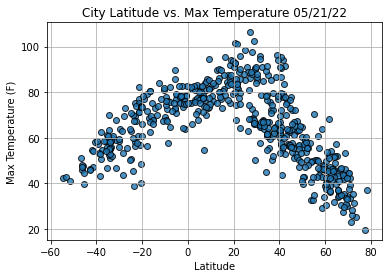

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

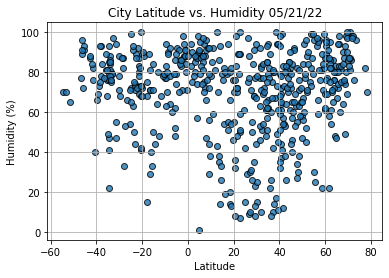

In [51]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

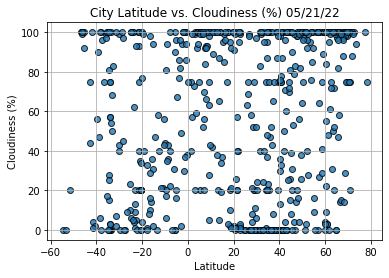

In [52]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

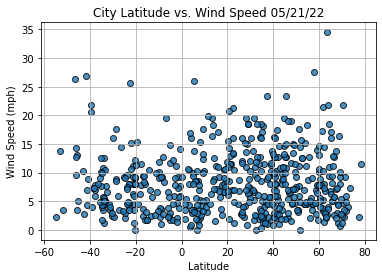

In [53]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()